In [3]:
#pandas
import pandas as pd


In [19]:
data =pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [11]:
data.tail()#derniere valeur

TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

In [12]:
data.shape

(200, 4)

In [20]:
import seaborn as sns
%matplotlib inline

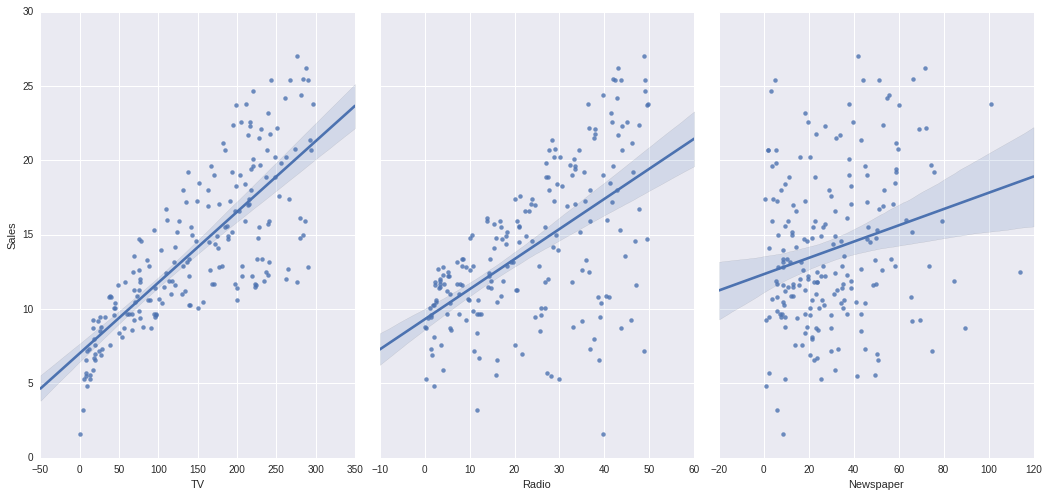

In [22]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind='reg')

In [23]:
feature_cols=['TV','Radio','Newspaper']

X=data[feature_cols]
X=data[['TV','Radio','Newspaper']]
X.head()

TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

In [24]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [25]:
y=data['Sales']
y=data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [26]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [31]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [33]:
from sklearn.linear_model import LinearRegression

In [42]:
#train test
linreg =LinearRegression()
linreg.fit(X_train,y_train)
linreg.predict(X)
print(linreg.intercept_)
print(linreg.coef_)


2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [43]:
list(zip(feature_cols,linreg.coef_))

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111803788)]

In [44]:
y_pred=linreg.predict(X_test)

In [45]:
true=[100,50,30,20]
pred=[90,50,50,30]
print((10+0+20+10)/4.)
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


In [48]:
print((10**2+0**2+20**2+10**2)/4.)
print(metrics.mean_squared_error(true,pred))

150.0
150.0


In [50]:
import numpy as np
print(np.sqrt((10**2+0**2+20**2+10**2)/4))
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.2474487139
12.2474487139


In [51]:
 print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.40465142303


In [55]:
X=data[['TV','Radio']]
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
#train test
linreg =LinearRegression()
linreg.fit(X_train,y_train)
linreg.predict(X)
print(linreg.intercept_)
print(linreg.coef_)
list(zip(feature_cols,linreg.coef_))
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2.92723732027
[ 0.04660234  0.18117959]
1.38790346994


In [56]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [57]:
iris=load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4)

In [59]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.973684210526


In [60]:
from sklearn.cross_validation import cross_val_score

In [62]:
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [64]:
print(scores.mean()) 

0.966666666667


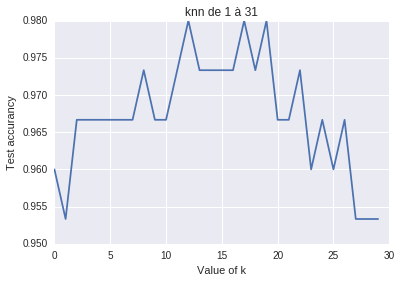

In [67]:
scoresap=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    scoresap.append(scores.mean())
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("knn de 1 à 31") 
plt.plot(scoresap)
plt.xlabel('Value of k')
plt.ylabel('Test accurancy')

In [69]:
knn =KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())


0.98


In [70]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.953333333333


In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [98]:
data =pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
data.head()
X=data[['TV','Radio']]
y=data['Sales']

In [85]:
from sklearn.linear_model import LinearRegression

In [99]:
linreg =LinearRegression()

score=cross_val_score(linreg,X,y,cv=10,scoring='mean_squared_error')
print(abs(score))
np.sqrt(abs(score)).mean()

[ 3.38264572  3.28736055  2.09185507  2.81784389  1.27311083  1.74391853
  8.0006111   2.07650936  3.03635301  2.4289835 ]


1.6796748419090766

In [100]:
X=data[['TV','Radio','Newspaper']]
y=data['Sales']
linreg =LinearRegression()

score=cross_val_score(linreg,X,y,cv=10,scoring='mean_squared_error')
print(abs(score))
np.sqrt(abs(score)).mean()

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


1.6913531708051797